# Linear Regression :: Linear Regression with sklearn

boston data를 활용하여 scikit-learn에서 제공하는 linear regression을 사용하여 실제로 Y값을 예측하는 코드를 작성하는 방법

### Boston House Price Dataset <br/>
- 머신러닝 등 데이터분석을 처음 배울 때, 가장 대표적으로 사용하는 Example Dataset

- 1978년에 발표된 데이터로, 미국 인구통계 조사 결과 미국 보스턴 지역의 주택 가격에 영향을 미친 요소들을 정리함

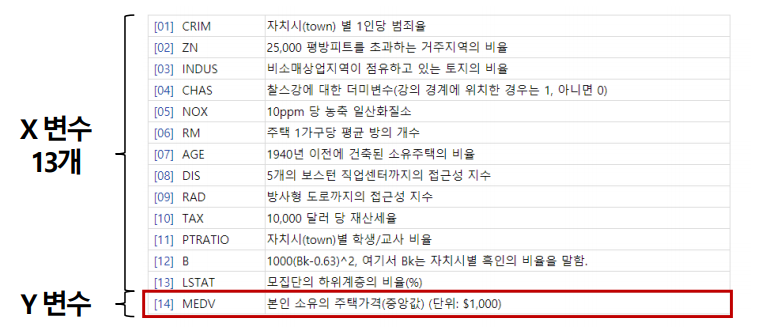

https://archive.ics.uci.edu/ml/datasets/Housing

***
<br/>

### 데이터 로딩

In [1]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np

In [2]:
boston = load_boston()
boston["data"]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [3]:
x_data = boston.data
y_data = boston.target.reshape(boston.target.size, 1)

In [4]:
y_data.shape

(506, 1)

In [5]:
x_data[:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

### 데이터 스케일링


In [6]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler().fit(x_data)
# standard_scale = preprocessing.StandardScaler().fit(x_data)
x_scaled_data = minmax_scale.transform(x_data)

x_scaled_data[:3]

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, 0.00000000e+00,
        3.14814815e-01, 5.77505269e-01, 6.41606591e-01, 2.69203139e-01,
        0.00000000e+00, 2.08015267e-01, 2.87234043e-01, 1.00000000e+00,
        8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, 0.00000000e+00,
        1.72839506e-01, 5.47997701e-01, 7.82698249e-01, 3.48961980e-01,
        4.34782609e-02, 1.04961832e-01, 5.53191489e-01, 1.00000000e+00,
        2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, 0.00000000e+00,
        1.72839506e-01, 6.94385898e-01, 5.99382080e-01, 3.48961980e-01,
        4.34782609e-02, 1.04961832e-01, 5.53191489e-01, 9.89737254e-01,
        6.34657837e-02]])

### Train - Test Split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled_data, y_data, test_size=0.33)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((339, 13), (167, 13), (339, 1), (167, 1))

### Linear regression fitting

In [9]:
from sklearn import linear_model

regr = linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
regr.fit(x_scaled_data, y_data)

regr

LinearRegression(n_jobs=1)

In [10]:
# # The coefficients
print('Coefficients: ', regr.coef_)
print('intercept: ', regr.intercept_)

Coefficients:  [[ -9.60975755   4.64204584   0.56083933   2.68673382  -8.63457306
   19.88368651   0.06721501 -16.22666104   7.03913802  -6.46332721
   -8.95582398   3.69282735 -19.01724361]]
intercept:  [26.62026758]


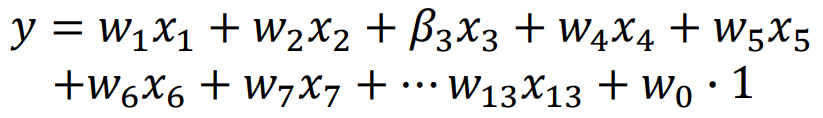

### 수식 결과비교

In [11]:
regr.predict(x_data[0].reshape(1, -1))

array([[-496.63540908]])

In [12]:
x_data[0].dot(regr.coef_.T) + regr.intercept_

array([-496.63540908])

### Metric 측정

In [13]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [14]:
y_true = y_test
y_hat = regr.predict(X_test)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)

(0.748336752104465, 3.2828674717048387, 22.5102209338545)

In [15]:
y_true = y_train
y_hat = regr.predict(X_train)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)

(0.7364106098215966, 3.2649490104449903, 21.59167457817485)